In [1]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

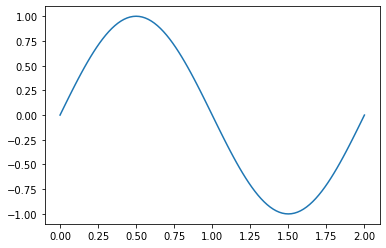

In [2]:
# Setup sine function and it's derivative
def f(x):
    return np.sin(np.pi*x)

def f_deriv(x):
    return np.pi * np.cos(np.pi*x)

# Plot f
x = np.linspace(0,2,101)
y = f(x)

plt.plot(x,y)
plt.show()

# Plot function and its interpolant as well as the interpolation points.
def plot(x, f, G, x_0, y_0):
    plt.scatter(x_0, y_0)
    plt.plot(x,f(x), label="f")
    plt.plot(x,G(x), label="G")
    plt.legend()
    plt.show()

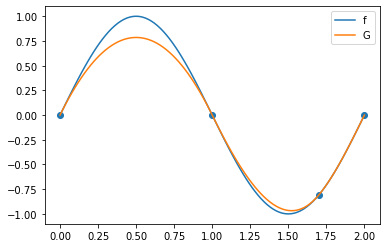

In [3]:
# Evaluate the 4 Hermite basis functions at the given point(s) x.
def hermite_basis(x):
    return np.vstack([1 - 3*np.power(x,2) + 2*np.power(x,3), 
                      3*np.power(x,2) - 2*np.power(x,3),
                     x - 2*np.power(x,2) + np.power(x,3),
                     -np.power(x,2) + np.power(x,3)])

# Evaluate the hermite interpolation polynomial on the unit interval [0, 1]
# y_0[0] = f(0), y_0[1] = f(1), y_0_deriv[0] = f'(0), y_0_deriv[1] = f'(1)
def hermite_interp_0_1(y_0, y_0_deriv, x):
    [h_0, h_1, h_2, h_3] = hermite_basis(x)
    return y_0[0] * h_0 + \
           y_0[1] * h_1 + \
           y_0_deriv[0] * h_2 + \
           y_0_deriv[1] * h_3

# Evaluate the hermite interpolation polynomial given by the points x_0, y_0 with derivatives y_0_deriv at x
def hermite_interp(x_0, y_0, y_0_deriv, x):
    y = np.zeros(x.shape)
    for i, xi in enumerate(x):
        # Check whether xi is an interpolation point
        possible_index = np.where(np.abs(xi - x_0) < 1e-8)[0]
        if len(possible_index) > 0:
            y[i] = y_0[possible_index[0]]
        else:
            lower_end = np.max(np.where(x_0 < xi))
            upper_end = np.min(np.where(x_0 > xi))
            h = x_0[upper_end] - x_0[lower_end]
            y_interval = y_0[[lower_end, upper_end]]
            y_interval_deriv = y_0_deriv[[lower_end, upper_end]] * h
            y[i] = hermite_interp_0_1(y_interval, y_interval_deriv, (xi - x_0[lower_end]) / h)
    return y
    
x_0 = np.array([0,1,1.7,2])
y_0 = f(x_0)
y_0_deriv = f_deriv(x_0)

# Create a function to evaluate the interpolating polynomial more easily.
G = lambda x: hermite_interp(x_0, y_0, y_0_deriv, x)

plot(x, f, G, x_0, y_0)